In [ ]:
import zipfile

# Unzip the archive
local_zip = '/content/drive/MyDrive/dữ liệu cho ML/cats_dogs_elephants.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

base_dir = '/content/cats_dogs_elephants'
# Change the base_dir to where you put dataset
print("Contents of base directory:")
print(os.listdir(base_dir))
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['dogs', 'cats', 'elephants']

Contents of validation directory:
['dogs', 'cats', 'elephants']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_elephants_dir = os.path.join(train_dir, 'elephants')
# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_elephants_dir = os.path.join(validation_dir, 'elephants')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of train directory:
['dogs', 'cats', 'elephants']

Contents of validation directory:
['dogs', 'cats', 'elephants']


In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
train_elephant_fnames = os.listdir(train_elephants_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print(train_elephant_fnames[:10])

print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))
print('total training elephant images :', len(os.listdir(train_elephants_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))
print('total validation elephant images :', len(os.listdir(validation_elephants_dir)))

['cat.107.jpg', 'cat.482.jpg', 'cat.201.jpg', 'cat.682.jpg', 'cat.695.jpg', 'cat.406.jpg', 'cat.58.jpg', 'cat.517.jpg', 'cat.48.jpg', 'cat.721.jpg']
['dog.356.jpg', 'dog.760.jpg', 'dog.913.jpg', 'dog.234.jpg', 'dog.553.jpg', 'dog.230.jpg', 'dog.873.jpg', 'dog.276.jpg', 'dog.867.jpg', 'dog.745.jpg']
['elephant.132.jpg', 'elephant.907.jpeg', 'elephant.613.jpeg', 'elephant.232.jpg', 'elephant.417.jpeg', 'elephant.539.jpeg', 'elephant.355.jpg', 'elephant.636.jpeg', 'elephant.918.jpeg', 'elephant.600.jpeg']
total training cat images : 1000
total training dog images : 1000
total training elephant images : 1000
total validation cat images : 500
total validation dog images : 500
total validation elephant images : 500


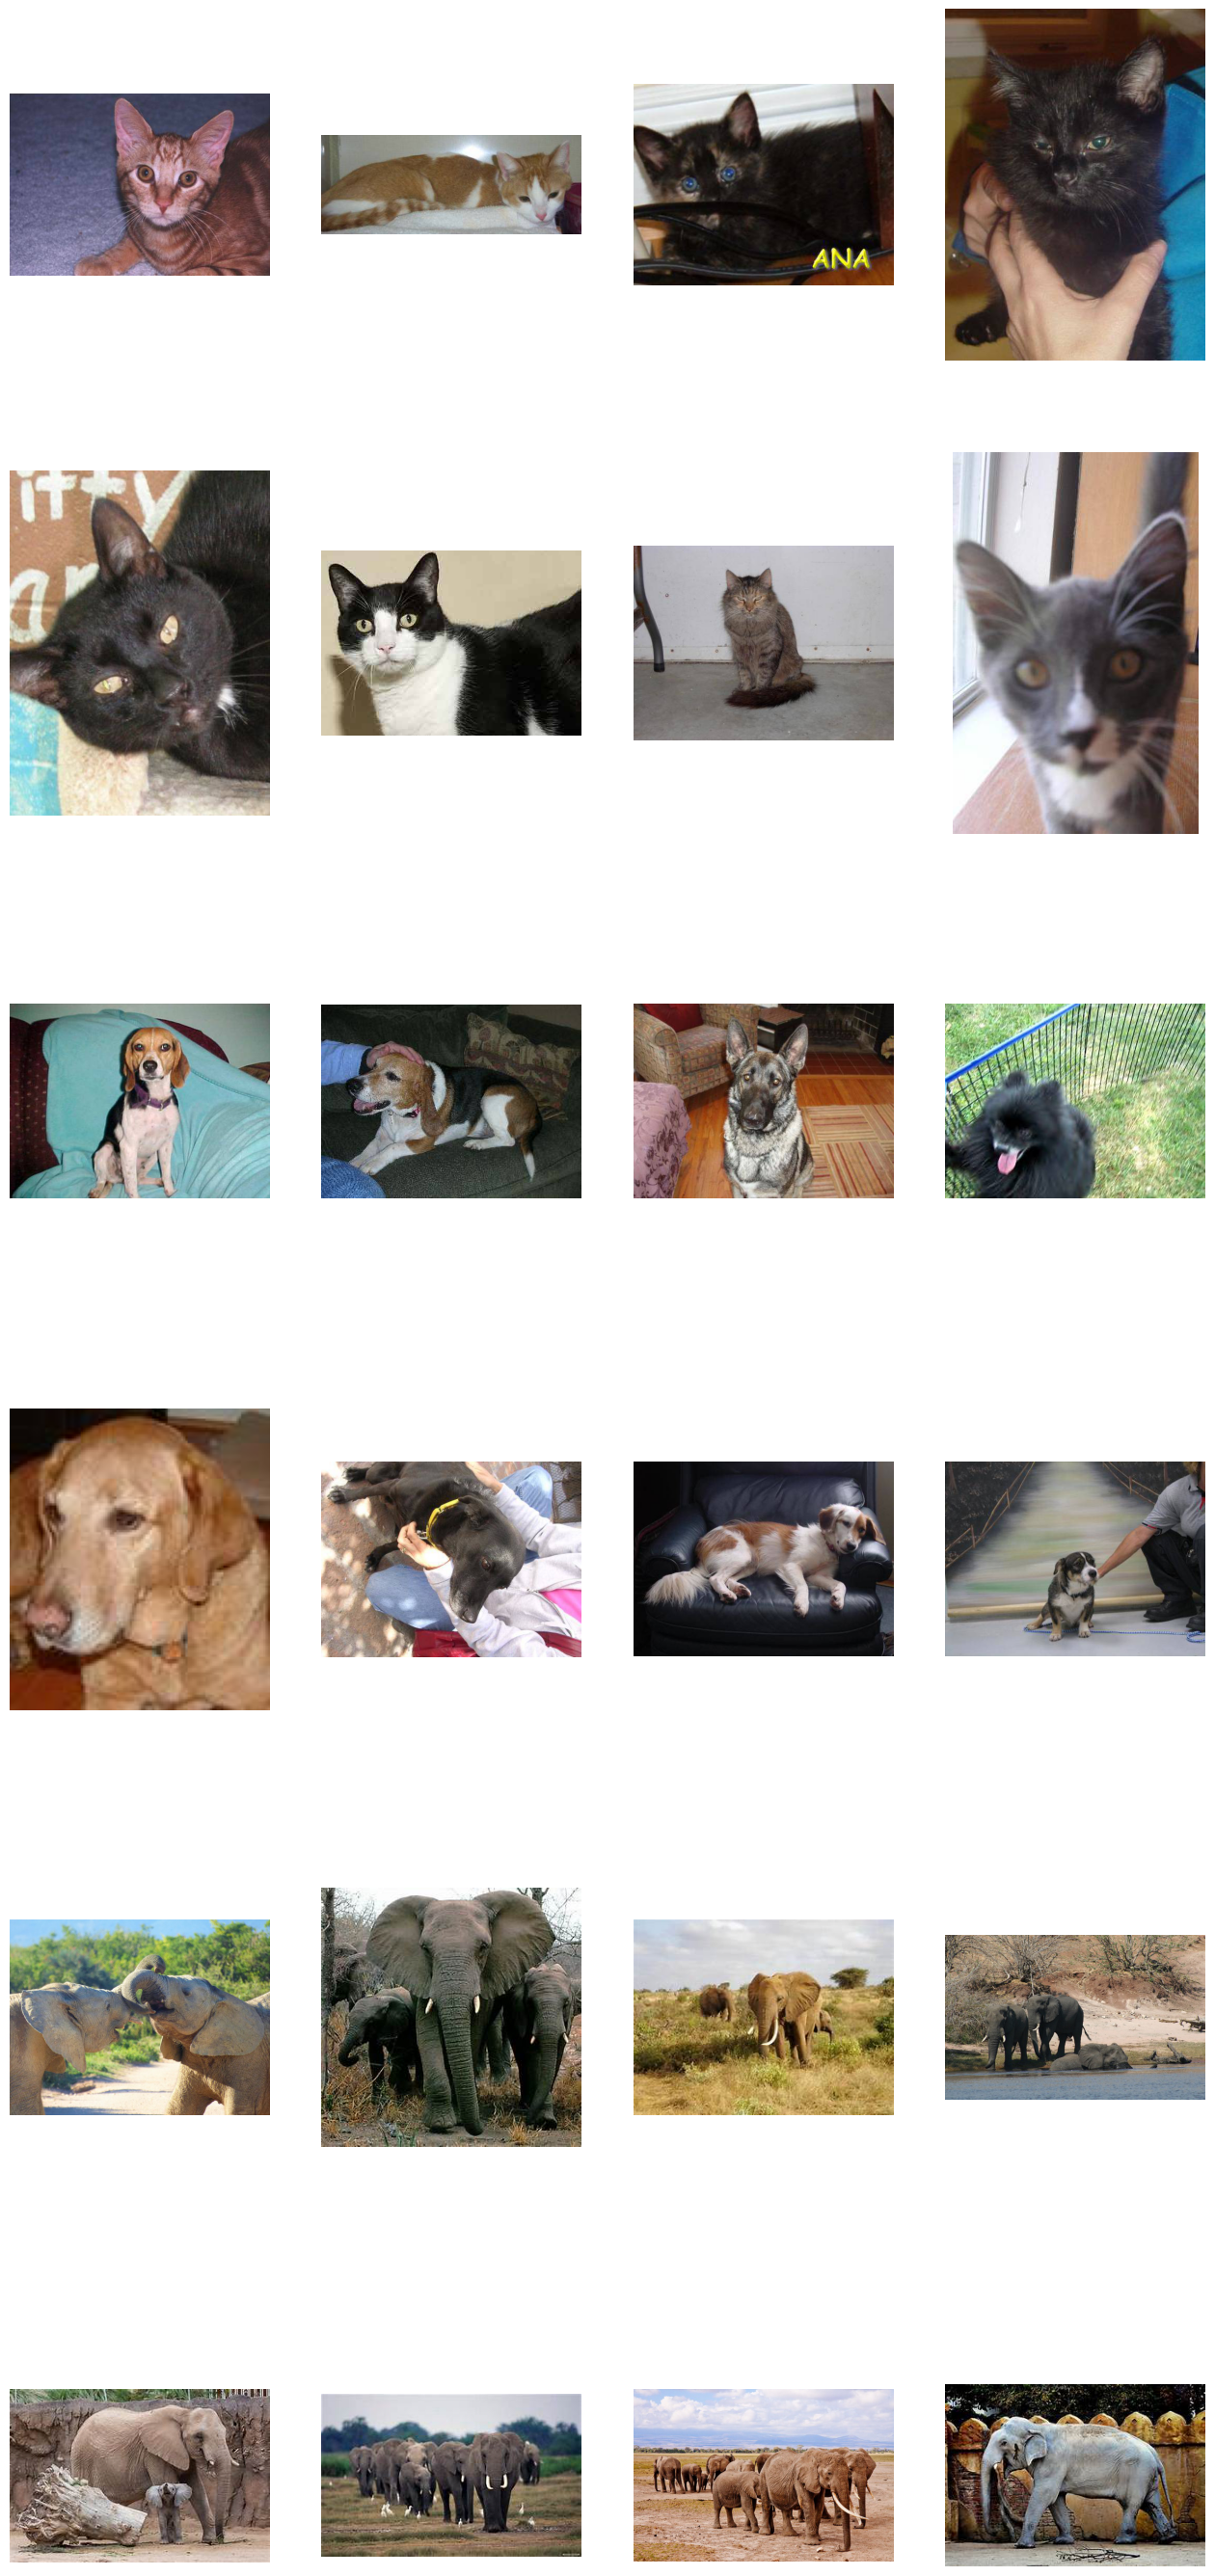

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 6x4 configuration
nrows = 6
ncols = 4
pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*6)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)for fname in train_cat_fnames[ pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)for fname in train_dog_fnames[ pic_index-8:pic_index]]
next_elephant_pix = [os.path.join(train_elephants_dir, fname)for fname in train_elephant_fnames[ pic_index-8:pic_index]]
for i, img_path in enumerate(next_cat_pix+next_dog_pix+next_elephant_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

1) Thực hiện việc rút gọn số chiều dữ liệu, sau đó tham khảo để hiển thị trực quan các phân
lớp dữ liệu dạng 3D hoặc 2D.

In [ ]:
import cv2
import numpy as np
image_size = 100
X_train =np.zeros((3000, image_size**2))

train_cat_path =[os.path.join(train_cats_dir, fname)for fname in train_cat_fnames]
train_dog_path =[os.path.join(train_dogs_dir, fname)for fname in train_dog_fnames]
train_elephant_path =[os.path.join(train_elephants_dir, fname)for fname in train_elephant_fnames]

count = 0

for img_path in train_cat_path+train_dog_path+train_elephant_path:
  img = cv2.resize(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE),(image_size,image_size), interpolation = cv2.INTER_AREA).flatten()

  X_train[count] =img
  count += 1
y_train = np.array(1000 * [0] + 1000 * [1] + 1000 * [2])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)

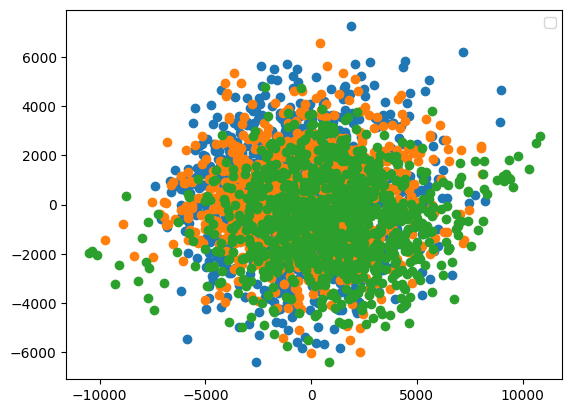

In [ ]:
import matplotlib.pyplot as plt

#x = X_train_pca[:, 0]
#y = X_train_pca[:, 1]
#z = X_train_pca[:, 2]

#plt.scatter(x[:1000], y[:1000], label = 'cat')
#plt.scatter(x[1000:2000], y[1000:2000], label = 'dog')
#plt.scatter(x[2000:], y[2000:], label = 'elephant')

for i in np.unique(y_train):
  plt.scatter(X_train_pca[y_train==i, :][:, 0], X_train_pca[y_train==i, :][:, 1])

plt.legend()

3) Xây dựng chương trình sử dụng mô hình Multinomial Logistic Regression (Softmax) để phân loại các hình ảnh, huấn luyện mô hình bằng tập dữ liệu training sau đó chạy kiểm tra với dữ liệu trong tập validation.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score

# load data and preprocess
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=68)

# build model
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=5000)

# train model
clf.fit(X_train, y_train)

# predict labels for validation data
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# calculate recall
recall = recall_score(y_test, y_pred, average='macro')
print('Recall:', recall)

# calculate precision
precision = precision_score(y_test, y_pred, average='macro')
print('Precision:', precision)

Accuracy: 0.390625
Confusion matrix:
 [[53 48 28]
 [50 40 36]
 [31 41 57]]
Recall: 0.390057831918297
Precision: 0.39222476253494526


4) Xây dựng chương trình sử dụng mô hình Multi-Classes Support Vector Machine để phân loại các hình ảnh, huấn luyện mô hình bằng tập dữ liệu training sau đó chạy kiểm tra với dữ liệu trong tập validation.

In [ ]:
# Import các thư viện cần thiết
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score


# Tạo mô hình SVM và huấn luyện trên tập training
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập validation
y_pred = svm_model.predict(X_test)

# Tính toán độ chính xác của mô hình
acc = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình là: ", acc)

# Tính toán ma trận 
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix của mô hình là: \n", cm)

# Tính toán recall và precision 
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
print("Recall của mô hình là: ", recall)
print("Precision của mô hình là: ", precision)

5) So sánh độ chính xác (sử dụng accuracy, confusion matrix, recall và precision) của các mô hình trong ý 4) và ý 3).